# Descripción

Clasificación multiclase: Masas M-B y Calcificaciones M-B.
- El tamaño de las imágenes  es de 224x22
- Las etiquetas se generan aquí
- NO se toman en cuenta las imágenes BWC

In [1]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# Cargamos las  rutas de las imágenes:

MASAS:

In [2]:
rutas_train_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_BENIGN_577.npy')

In [3]:
len(rutas_train_mass_benign)

577

In [4]:
rutas_test_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_BENIGN_194.npy')

In [5]:
len(rutas_test_mass_benign)

194

In [6]:
rutas_train_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_MALIGNANT_637.npy')

In [7]:
len(rutas_train_mass_malignant)

637

In [8]:
rutas_test_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_MALIGNANT_147.npy')

In [9]:
len(rutas_test_mass_malignant)

147

In [10]:
577+147+637+194

1555

Calcificaciones

In [11]:
rutas_train_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_BENIGN_528.npy')

In [12]:
len(rutas_train_calc_benign)

528

In [13]:
rutas_test_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_BENIGN_130.npy')

In [14]:
len(rutas_test_calc_benign)

130

In [15]:
rutas_train_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_MALIGNANT_544.npy')

In [16]:
len(rutas_train_calc_malignant)

544

In [17]:
rutas_test_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_MALIGNANT_129.npy')

In [18]:
len(rutas_test_calc_malignant)

129

# Generamos las etiquetas (numericas) para ingresarlas al modelo

## Masas
Malignant = 3, Benign = 2.

In [26]:
etiq_train_mass_malignant = 3*np.ones(len(rutas_train_mass_malignant), dtype=int) # Mass M --> 3

In [27]:
len(etiq_train_mass_malignant)

637

In [28]:
etiq_test_mass_malignant = 3*np.ones(len(rutas_test_mass_malignant), dtype=int) # Mass M --> 3

In [29]:
len(etiq_test_mass_malignant)

147

In [30]:
etiq_train_mass_benign = 2*np.ones(len(rutas_train_mass_benign), dtype=int) # Mass B --> 2

In [31]:
len(etiq_train_mass_benign)

577

In [32]:
etiq_test_mass_benign = 2*np.ones(len(rutas_test_mass_benign), dtype=int) # Mass B --> 2

In [33]:
len(etiq_test_mass_benign)

194

In [34]:
etiq_test_mass_benign

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
etiq_test_mass_malignant

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## Calcificaciones
Benign = 0, Malignant = 1

In [36]:
etiq_train_calc_benign = np.zeros(len(rutas_train_calc_benign), dtype=int) #Calc B -->0

In [37]:
len(etiq_train_calc_benign)

528

In [38]:
etiq_test_calc_benign = np.zeros(len(rutas_test_calc_benign), dtype=int) #Calc B -->0

In [39]:
len(etiq_test_calc_benign)

130

In [40]:
etiq_train_calc_malignant = np.ones(len(rutas_train_calc_malignant), dtype=int) #Calc M -->1

In [41]:
len(etiq_train_calc_malignant)

544

In [42]:
etiq_test_calc_malignant = np.ones(len(rutas_test_calc_malignant), dtype=int) #Calc M -->1

In [43]:
len(etiq_test_calc_malignant)

129

In [44]:
etiq_test_calc_malignant

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
etiq_test_calc_benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Concatenamos las rutas de las imagenes

Train:

In [46]:
rutas_train = np.concatenate((rutas_train_calc_malignant,rutas_train_calc_benign, rutas_train_mass_malignant,rutas_train_mass_benign)) 
# Concatenacion: Calc M, Calc B, Mass M, Mass B

In [47]:
len(rutas_train)

2286

In [48]:
etiq_train = np.concatenate((etiq_train_calc_malignant, etiq_train_calc_benign, etiq_train_mass_malignant,etiq_train_mass_benign))
# Concatenacion: Calc M, Calc B, Mass M, Mass B


In [49]:
len(etiq_train)

2286

Test:

In [50]:
rutas_test = np.concatenate((rutas_test_mass_benign,rutas_test_calc_benign,rutas_test_calc_malignant,rutas_test_mass_malignant)) 
# Concatenacion: Mass B, Calc B, Calc M, Mass M

In [51]:
len(rutas_test)

600

In [52]:
etiq_test = np.concatenate((etiq_test_mass_benign, etiq_test_calc_benign, etiq_test_calc_malignant,etiq_test_mass_malignant))
# Concatenacion: Mass B, Calc B, Calc M, Mass M

In [53]:
len(etiq_test)

600

In [54]:
etiq_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Creamos los conjuntos Train, Validación
Usamos  **train_test_split** de sklearn para su reproducibilidad.

In [56]:
X = rutas_train
y = etiq_train

In [57]:
len(X)

2286

In [58]:
len(y)

2286

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # stratify=y=labels

In [61]:
len(X_train)

1828

In [62]:
len(X_val)

458

# Funciones de TensorFlow

Para realizar operaciones de lectura y resize

In [75]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array # inst PIL --> ARREGLO NUMPY
from tensorflow.image import resize

Funcion resize con tf:

In [76]:
def resize_dicom(img_dicom,width,height): # Img DICOM readed ---> Tensor([width,heigth,1]), dtype float32 (originalmente son uint 16)
    pxls_img_dicom = img_dicom.pixel_array #Obtenemos los pixeles de las imágenes DICOM
    pxls_img_dicom_3D = img_to_array(pxls_img_dicom) #Formamos un tensor de la forma (w_DICOM,h_DICOM,1), escala de grises
    img_dicom_resize = resize(pxls_img_dicom_3D,(width,height)) #Se puede plotear con: plt.imshow(img_resize, cmap=plt.cm.bone)
    return img_dicom_resize

# Visualizacion

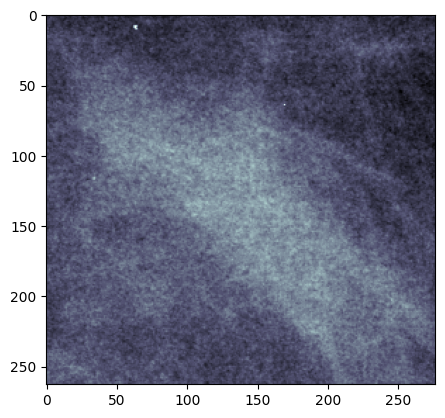

In [77]:
#Tamaño original
plt.imshow(pydicom.dcmread(X_train[100]).pixel_array, cmap=plt.cm.bone) # Img Original

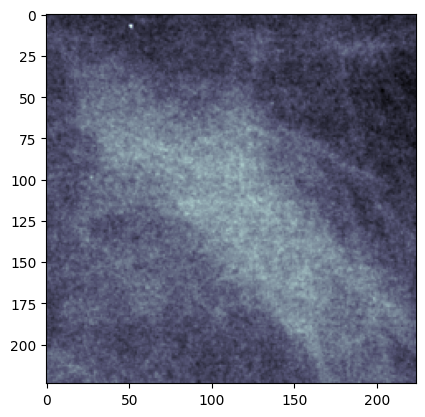

In [78]:
#imagen con resize
plt.imshow(resize_dicom(pydicom.dcmread(X_train[100]),224,224), cmap=plt.cm.bone) #Img con resize

# Obtencion de imagenes como tensores

In [79]:
#Funcion que les hace resize a las imagenes y obtiene los pixeles resultantes den forma de tensores
def genera_tensores_train_test(width,height,lista_de_rutas):
    """
    width a redimensionar
    height a redimensionar
    lista de rutas
    """
    imgs_tensores = []

    for file in list(lista_de_rutas):
        read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
        img_tensor = resize_dicom(read_img_dicom,width,height) #Lammado a la funcion resize_dicom ---> Tensor de "16 bits" con dtype = float32
        imgs_tensores.append(img_tensor) #juntar los tensores
        
    # Convertir listas a (arrays de NumPy) Tensores
    imagenes = tf.stack(imgs_tensores) #Axis = 0 por default, concatena en vertical(columnas), axis = 1 en horizontal (filas). --->(num_imgs,width,height,1)
    return imagenes # Tensores 
        

## Obtencion de las imágenes como tensores
imgs_train, imgs_val e imgs_test

In [81]:
imgs_train = genera_tensores_train_test(224,224,X_train) 

In [82]:
len(imgs_train)

1828

In [83]:
imgs_val = genera_tensores_train_test(224,224,X_val) 

In [84]:
len(imgs_val)

458

In [85]:
imgs_test = genera_tensores_train_test(224,224,rutas_test) 

In [86]:
len(imgs_test)

600

# Preprocesamiento

One Hot Encoding

In [99]:
from tensorflow.keras.utils import to_categorical


In [100]:
train_labels_comb = to_categorical(y_train, num_classes=4) 

In [101]:
val_labels_comb = to_categorical(y_val, num_classes=4) 

In [102]:
test_labels_comb = to_categorical(etiq_test, num_classes=4) 

Tensores

In [103]:
# Convertir del rango (0-65535) a (0-255). Recordemos que  2**8 =  (DATOS(2**16)/2**8) neq (65535/65535)*255
train_images_comb = (imgs_train/65535)*255
val_images_comb = (imgs_val/65535)*255
test_images_comb = (imgs_test/65535)*255

In [104]:
#Replicate the only color channel (gray) 3 times, for Pre-trained Nets compatibility (se puede usar tf.TILE)
train_images_comb  = tf.image.grayscale_to_rgb(train_images_comb)
val_images_comb = tf.image.grayscale_to_rgb(val_images_comb)
test_images_comb = tf.image.grayscale_to_rgb(test_images_comb)

In [105]:
train_images_comb.shape

TensorShape([1828, 224, 224, 3])

In [106]:
val_images_comb.shape

TensorShape([458, 224, 224, 3])

In [107]:
test_images_comb

<tf.Tensor: shape=(600, 224, 224, 3), dtype=float32, numpy=
array([[[[198.54288 , 198.54288 , 198.54288 ],
         [202.72948 , 202.72948 , 202.72948 ],
         [201.89041 , 201.89041 , 201.89041 ],
         ...,
         [202.3872  , 202.3872  , 202.3872  ],
         [198.6291  , 198.6291  , 198.6291  ],
         [196.28775 , 196.28775 , 196.28775 ]],

        [[199.23979 , 199.23979 , 199.23979 ],
         [201.64929 , 201.64929 , 201.64929 ],
         [196.69    , 196.69    , 196.69    ],
         ...,
         [201.05974 , 201.05974 , 201.05974 ],
         [196.58028 , 196.58028 , 196.58028 ],
         [197.25252 , 197.25252 , 197.25252 ]],

        [[202.11418 , 202.11418 , 202.11418 ],
         [201.99046 , 201.99046 , 201.99046 ],
         [198.87268 , 198.87268 , 198.87268 ],
         ...,
         [197.1758  , 197.1758  , 197.1758  ],
         [196.82816 , 196.82816 , 196.82816 ],
         [197.71243 , 197.71243 , 197.71243 ]],

        ...,

        [[221.51677 , 221.51677 

# Experimento

In [108]:
from keras import layers
from keras import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications import ResNet50, InceptionV3, DenseNet121, MobileNetV2, VGG19, VGG16
#from keras.applications.vgg19 import preprocess_input as  vgg_preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input as res_preprocess_input
#from keras.applications.inception_v3 import preprocess_input as inv3_preprocess_input
#from keras.applications.densenet import preprocess_input as dens_preprocess_input
#from keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess_input

Importante al seleccionar la red y el preprocess_input

In [109]:
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input as res_preprocess_input

# ResNet50

In [110]:
# Preprocess the test images
res_preprocess_input(test_images_comb)

<tf.Tensor: shape=(600, 224, 224, 3), dtype=float32, numpy=
array([[[[ 94.603874 ,  81.76388  ,  74.86288  ],
         [ 98.790474 ,  85.95048  ,  79.04948  ],
         [ 97.95141  ,  85.11141  ,  78.21041  ],
         ...,
         [ 98.448204 ,  85.60821  ,  78.70721  ],
         [ 94.6901   ,  81.850105 ,  74.949104 ],
         [ 92.34875  ,  79.50875  ,  72.60775  ]],

        [[ 95.30079  ,  82.46079  ,  75.55979  ],
         [ 97.71029  ,  84.87029  ,  77.96929  ],
         [ 92.751    ,  79.911    ,  73.01     ],
         ...,
         [ 97.120735 ,  84.28074  ,  77.37974  ],
         [ 92.64127  ,  79.80128  ,  72.900276 ],
         [ 93.313515 ,  80.47352  ,  73.57252  ]],

        [[ 98.17518  ,  85.33518  ,  78.43418  ],
         [ 98.05146  ,  85.211464 ,  78.31046  ],
         [ 94.93368  ,  82.09368  ,  75.19268  ],
         ...,
         [ 93.23679  ,  80.3968   ,  73.4958   ],
         [ 92.88915  ,  80.04916  ,  73.148155 ],
         [ 93.77343  ,  80.93343  ,  74.0324

In [111]:
test_preprocess = res_preprocess_input(test_images_comb)

MODELO

In [112]:
# Build a model using VGG16 convolutional base and new FC final layer
def create_res(fc_size, verbose=False, dropout=None): #fc_size=Número de neuronas finales
  res_base = ResNet50(weights='imagenet', #Base convolucional CORRESPONDIENTE
                       include_top=False,
                       input_shape=(224,224, 3)) # Modifica según el tipo de entrada
  res = models.Sequential()
  res.add(res_base)

  res.add(layers.Flatten())
  if dropout is not None:
    res.add(layers.Dropout(dropout, seed=42)) # SEMILLA
  res.add(layers.Dense(fc_size, activation='relu'))
  res.add(layers.Dense(4, activation='softmax')) # TIPO de PROBLEA: Binario o Multietiqueta

  # Freeze the convolutional base
  res_base.trainable = False

  if verbose:
    res_base.summary()
    res.summary()

  return res

In [113]:
Ejemplo = create_res(512, verbose=True)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [114]:
# Create a HARD generator for training images (split = 0.15 it was 0.2)
train_datagen_HARD_res = ImageDataGenerator(
    preprocessing_function = res_preprocess_input, #Preprocess indicado
    #validation_split=0.2, #!!! Separa en validación y entrenamiento !!!
    rotation_range=180,
    width_shift_range=0.2,#N
    height_shift_range=0.2, #N
    shear_range=15, #N Originalmente 10
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
)

# Fit the generator with some images
train_datagen_HARD_res.fit(train_images_comb)
val_datagen_res = ImageDataGenerator(preprocessing_function = res_preprocess_input) #Preprocess_input adecuada 

# Split train images into actual training and validation
train_generator_HARD_res = train_datagen_HARD_res.flow(train_images_comb, train_labels_comb, batch_size=128, shuffle=False)#, subset='training')
validation_generator_res = val_datagen_res.flow(val_images_comb, val_labels_comb, batch_size=128,shuffle=False)#, subset='validation')
#Se comenta subset ya que se ocupan distintos conjuntos de entrenamiento y validación, shuffle=True por default


In [119]:
# Instantiate network with custom final layer
fc_size = 256
res_fe_DO_H = create_res(fc_size = fc_size,dropout=0.5)

# Early stopping (stop training after the validation loss reaches the minimum)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1)

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_fe_4cl_best'+f'_{fc_size}_DO_HARD.h5',#NOMBRE
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)

# Compile the model
res_fe_DO_H.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # Cambiar el loss dependiendo del problema

In [120]:
# Train
history_res_fe_DO_H = res_fe_DO_H.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(train_images_comb) // 128, #len(train_generator_HARD_vgg19), #n_train_img // 128, modificar 128 si se modifica el batch size
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps=len(val_images_comb)//128, #Parametro a usar dependiendo si se dispone de validation data
        callbacks= [checkpoint, earlystopping],
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_fe_DO_H, 'res_fe_4cl_end'+f'_{fc_size}_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_4124\3922254080.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_res_fe_DO_H = res_fe_DO_H.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 37.3543 - accuracy: 0.3058
Epoch 1: val_loss improved from inf to 1.23401, saving model to res_fe_4cl_best_256_DO_HARD.h5
14/14 [==============================] - 14s 935ms/step - loss: 37.3543 - accuracy: 0.3058 - val_loss: 1.2340 - val_accuracy: 0.4010
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 1.2423 - accuracy: 0.4129
Epoch 2: val_loss did not improve from 1.23401
14/14 [==============================] - 7s 491ms/step - loss: 1.2423 - accuracy: 0.4129 - val_loss: 1.3058 - val_accuracy: 0.3490
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 1.2442 - accuracy: 0.4135
Epoch 3: val_loss improved from 1.23401 to 1.21923, saving model to res_fe_4cl_best_256_DO_HARD.h5
14/14 [==============================] - 12s 877ms/step - loss: 1.2442 - accuracy: 0.4135 - val_loss: 1.2192 - val_accuracy: 0.3776
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 1.1931 -

In [121]:
#History of accuracy and loss
tra_loss_fe = history_res_fe_DO_H.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_res_fe_DO_H.history['accuracy'] #######
val_loss_fe = history_res_fe_DO_H.history['val_loss'] ########
val_acc_fe = history_res_fe_DO_H.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set OBSEVRA QUE SE CAMBBIAN los nombres de las variables
opt_res_fe_DO_H = models.load_model('res_fe_4cl_best'+f'_{fc_size}_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_fe_DO_H.evaluate(test_images_comb, test_labels_comb, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_fe_DO_H.evaluate(test_images_comb, test_labels_comb, verbose=False) ##

print(f"ResNet50 Feature Extraction W/ dropout Hard DA {fc_size}\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

#OBSERVACIÓN: Se debe evaluar en test_preprocess y no en test_images_comb:
#test_loss_fe, test_acc_fe = res_fe_DO_H.evaluate(test_preprocess, test_labels_comb, verbose=False) #######Evalua modelo
#opt_test_loss_fe, opt_test_acc_fe = opt_res_fe_DO_H.evaluate(test_preprocess, test_labels_comb, verbose=False) ##
#La evaluación correcta en el Test con el modelo óptimo se hizo abajo. Este error NO afecta el entrenamiento,
#ya que la función res_preprocess_input fue ingresada en el ImageDataGenerator 

ResNet50 Feature Extraction W/ dropout Hard DA 256

Epoch [end]: 48
Epoch [opt]: 18
Valid accuracy [end]: 0.5938
Valid accuracy [opt]: 0.5573
Test accuracy [end]:  0.2917
Test accuracy [opt]:  0.2633
Valid loss [end]: 0.9105
Valid loss [opt]: 0.8856
Test loss [end]:  4.3965
Test loss [opt]:  2.8438


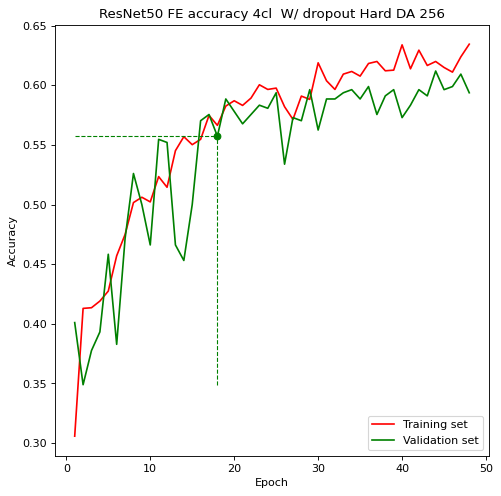

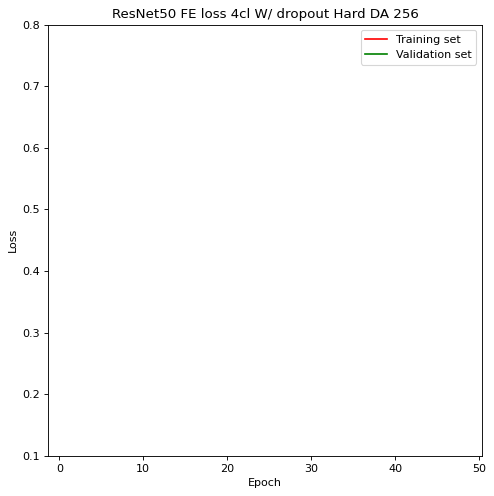

In [122]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'ResNet50 FE accuracy 4cl  W/ dropout Hard DA {fc_size}')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'ResNet50 FE loss 4cl W/ dropout Hard DA {fc_size}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [112]:
mod_256 = models.load_model(r'res_fe_4cl_best_256_DO_HARD.h5')
mod_256.evaluate(test_preprocess, test_labels_comb) #0.5483

19/19 [==============================] - 4s 26ms/step - loss: 0.9618 - accuracy: 0.5483


[0.9617767333984375, 0.5483333468437195]

ResNet50 Feature Extraction W/ dropout Hard DA 256

- Epoch [end]: 48
- Epoch [opt]: 18
- Valid accuracy [end]: 0.5938
- Valid accuracy [opt]: 0.5573
- Test accuracy [end]:  0.2917
- Test accuracy [opt]:  0.2633
- Valid loss [end]: 0.9105
- Valid loss [opt]: 0.8856
- Test loss [end]:  4.3965
- Test loss [opt]:  2.8438

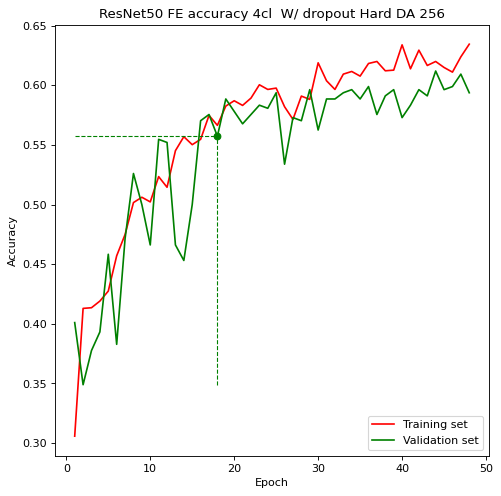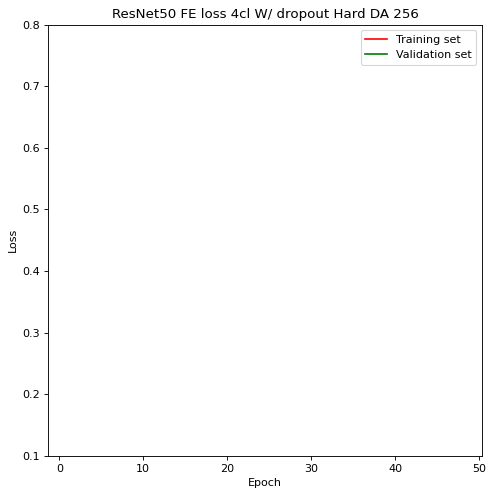

In [113]:
mod_1024 = models.load_model(r'res_fe_4cl_best_1024_DO_HARD.h5')
mod_1024.evaluate(test_preprocess, test_labels_comb) #0.5733

19/19 [==============================] - 1s 24ms/step - loss: 0.9427 - accuracy: 0.5733


[0.9426780939102173, 0.5733333230018616]

ResNet50 Feature Extraction W/ dropout Hard DA 1024

- Epoch [end]: 54
- Epoch [opt]: 24
- Valid accuracy [end]: 0.6042
- Valid accuracy [opt]: 0.6068
- Test accuracy [end]:  0.3050
- Test accuracy [opt]:  0.2900
- Valid loss [end]: 0.9516
- Valid loss [opt]: 0.8882
- Test loss [end]:  3.5820
- Test loss [opt]:  2.5095

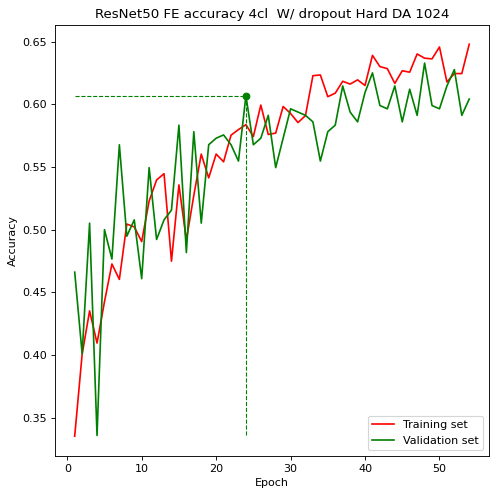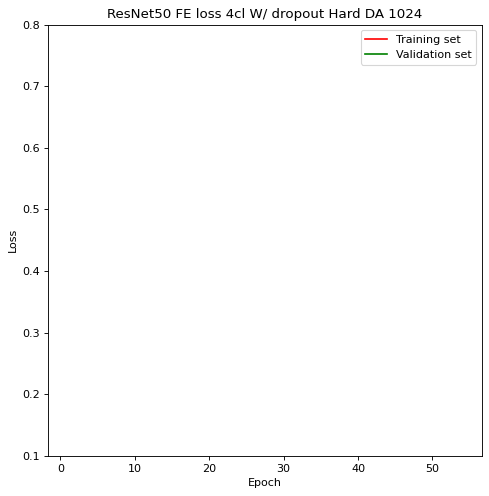

In [117]:
del res_fe_DO_H

In [118]:
del history_res_fe_DO_H

# Fine Tuning 1 layer
1024

In [115]:
from tensorflow.keras.optimizers import RMSprop

In [117]:
res_FT_1layer = models.load_model(r'res_fe_4cl_best_1024_DO_HARD.h5') # OJO con respecto a que modelo

fine_tuned_from_1layer = 143

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_1layer.layers[0].layers[:fine_tuned_from_1layer]:
    layer.trainable = False

for layer in res_FT_1layer.layers[0].layers[fine_tuned_from_1layer:]:
    layer.trainable = True

# Recompile the model
res_FT_1layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics=['accuracy'])

#res_FT_1layer.summary()

In [118]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) # cambia de nombre

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_1layer_4cl_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [119]:
# Train
history_FT_1L = res_FT_1layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg16), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_1layer, 'res_FT_1layer_4cl_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_11696\3698168330.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_1L = res_FT_1layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 1.9045 - accuracy: 0.5446
Epoch 1: val_loss improved from inf to 1.29576, saving model to res_FT_1layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 22s 1s/step - loss: 1.9045 - accuracy: 0.5446 - val_loss: 1.2958 - val_accuracy: 0.4974
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 1.0026 - accuracy: 0.5993
Epoch 2: val_loss improved from 1.29576 to 1.11967, saving model to res_FT_1layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 20s 1s/step - loss: 1.0026 - accuracy: 0.5993 - val_loss: 1.1197 - val_accuracy: 0.5182
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.9158 - accuracy: 0.5954
Epoch 3: val_loss improved from 1.11967 to 1.03205, saving model to res_FT_1layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 19s 1s/step - loss: 0.9158 - accuracy: 0.5954 - val_loss: 1.0320 - val_accuracy: 0.5547
Epoch 4/200

In [121]:
#History of accuracy and loss
tra_loss_fe = history_FT_1L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_1L.history['accuracy'] #######
val_loss_fe = history_FT_1L.history['val_loss'] ########
val_acc_fe = history_FT_1L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set OBSEVRA QUE SE CAMBBIAN los nombres de las variables
opt_res_FT = models.load_model('res_FT_1layer_4cl_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_1layer.evaluate(test_preprocess,test_labels_comb, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT.evaluate(test_preprocess,test_labels_comb, verbose=False) ##

print("Res Fine Tunig 1 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

Res Fine Tunig 1 Layer (W/ dropout Hard DA) 1024 U

Epoch [end]: 40
Epoch [opt]: 10
Valid accuracy [end]: 0.6354
Valid accuracy [opt]: 0.6146
Test accuracy [end]:  0.5617
Test accuracy [opt]:  0.6000
Valid loss [end]: 1.8678
Valid loss [opt]: 0.8183
Test loss [end]:  1.7757
Test loss [opt]:  0.8923


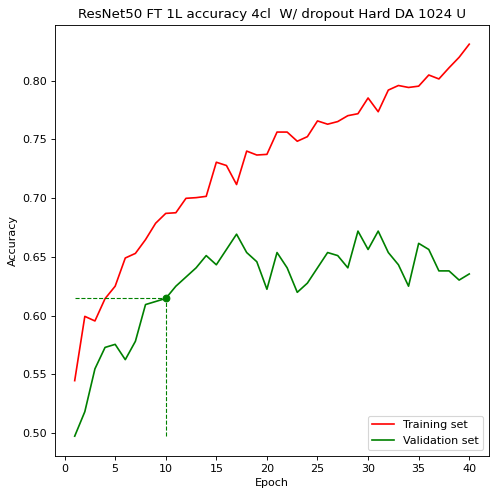

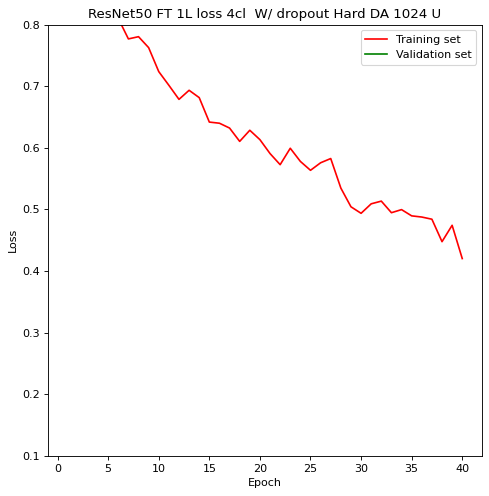

In [122]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 1L accuracy 4cl  W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 1L loss 4cl  W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

Res Fine Tunig 1 Layer (W/ dropout Hard DA) 1024 U

- Epoch [end]: 40
- Epoch [opt]: 10
- Valid accuracy [end]: 0.6354
- Valid accuracy [opt]: 0.6146
- Test accuracy [end]:  0.5617
- Test accuracy [opt]:  0.6000
- Valid loss [end]: 1.8678
- Valid loss [opt]: 0.8183
- Test loss [end]:  1.7757
- Test loss [opt]:  0.8923

# Fine Tuning 2 layers

In [124]:
res_FT_2layer = models.load_model('res_FT_1layer_4cl_best_1024_DO_HARD.h5') # OJO con respecto a que modelo

fine_tuned_from_2layer = 81

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_2layer.layers[0].layers[:fine_tuned_from_2layer]:
    layer.trainable = False

for layer in res_FT_2layer.layers[0].layers[fine_tuned_from_2layer:]:
    layer.trainable = True

# Recompile the model
res_FT_2layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics=['accuracy'])

#res_FT_2layer.summary()

In [125]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) # cambia de nombre

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_2layer_4cl_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [126]:
# Train
history_FT_2L = res_FT_2layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg16), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_2layer, 'res_FT_2layer_4cl_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_11696\2965561307.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_2L = res_FT_2layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 1.0382 - accuracy: 0.6077
Epoch 1: val_loss improved from inf to 0.93318, saving model to res_FT_2layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 21s 1s/step - loss: 1.0382 - accuracy: 0.6077 - val_loss: 0.9332 - val_accuracy: 0.6224
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.8374 - accuracy: 0.6289
Epoch 2: val_loss improved from 0.93318 to 0.90042, saving model to res_FT_2layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 22s 2s/step - loss: 0.8374 - accuracy: 0.6289 - val_loss: 0.9004 - val_accuracy: 0.6328
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.7537 - accuracy: 0.6585
Epoch 3: val_loss did not improve from 0.90042
14/14 [==============================] - 7s 492ms/step - loss: 0.7537 - accuracy: 0.6585 - val_loss: 0.9296 - val_accuracy: 0.6354
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 

In [127]:
#History of accuracy and loss
tra_loss_fe = history_FT_2L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_2L.history['accuracy'] #######
val_loss_fe = history_FT_2L.history['val_loss'] ########
val_acc_fe = history_FT_2L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set OBSEVRA QUE SE CAMBBIAN los nombres de las variables
opt_res_FT_2L = models.load_model('res_FT_2layer_4cl_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_2layer.evaluate(test_preprocess, test_labels_comb, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT_2L.evaluate(test_preprocess, test_labels_comb, verbose=False) ##

print("res Fine Tunig 2 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

res Fine Tunig 2 Layer (W/ dropout Hard DA) 1024 U

Epoch [end]: 32
Epoch [opt]: 2
Valid accuracy [end]: 0.6068
Valid accuracy [opt]: 0.6328
Test accuracy [end]:  0.5583
Test accuracy [opt]:  0.6117
Valid loss [end]: 2.8932
Valid loss [opt]: 0.9004
Test loss [end]:  2.5580
Test loss [opt]:  0.9604


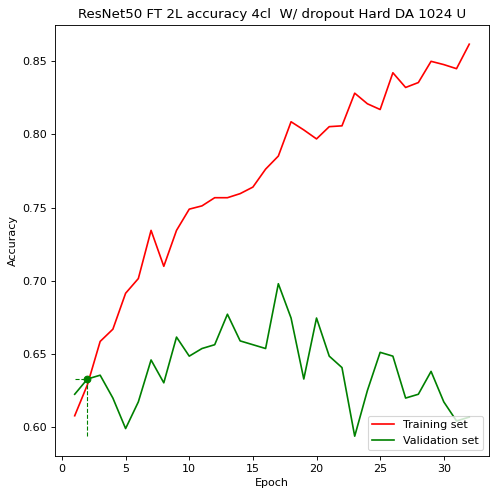

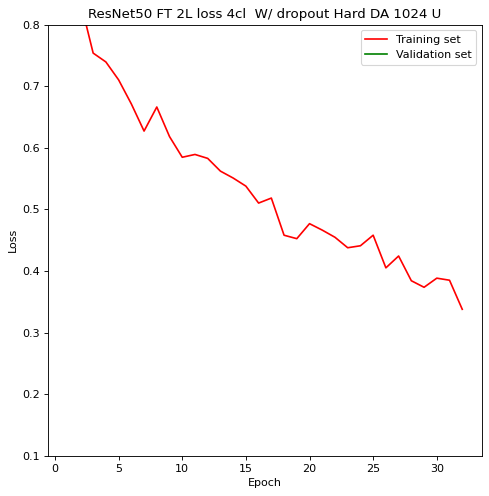

In [128]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 2L accuracy 4cl  W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 2L loss 4cl  W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

res Fine Tunig 2 Layer (W/ dropout Hard DA) 1024 U

- Epoch [end]: 32
- Epoch [opt]: 2
- Valid accuracy [end]: 0.6068
- Valid accuracy [opt]: 0.6328
- Test accuracy [end]:  0.5583
- Test accuracy [opt]:  0.6117
- Valid loss [end]: 2.8932
- Valid loss [opt]: 0.9004
- Test loss [end]:  2.5580
- Test loss [opt]:  0.9604

# Fine Tuning 3 Layer

In [123]:
res_FT_3layer = models.load_model(r'res_FT_2layer_4cl_best_1024_DO_HARD.h5') # OJO con respecto a que modelo

fine_tuned_from_3layer = 39

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_3layer.layers[0].layers[:fine_tuned_from_3layer]:
    layer.trainable = False

for layer in res_FT_3layer.layers[0].layers[fine_tuned_from_3layer:]:
    layer.trainable = True

# Recompile the model
res_FT_3layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics=['accuracy'])

#res_FT_1layer.summary()

In [124]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) # cambia de nombre

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_3layer_4cl_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [125]:
# Train
history_FT_3L = res_FT_3layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg16), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_3layer, 'res_FT_3layer_4cl_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_18224\199784266.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_3L = res_FT_3layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 0.8922 - accuracy: 0.6311
Epoch 1: val_loss improved from inf to 0.97498, saving model to res_FT_3layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 27s 1s/step - loss: 0.8922 - accuracy: 0.6311 - val_loss: 0.9750 - val_accuracy: 0.6380
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.7783 - accuracy: 0.6719
Epoch 2: val_loss improved from 0.97498 to 0.82062, saving model to res_FT_3layer_4cl_best_1024_DO_HARD.h5
14/14 [==============================] - 23s 2s/step - loss: 0.7783 - accuracy: 0.6719 - val_loss: 0.8206 - val_accuracy: 0.6406
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.7572 - accuracy: 0.6702
Epoch 3: val_loss did not improve from 0.82062
14/14 [==============================] - 7s 508ms/step - loss: 0.7572 - accuracy: 0.6702 - val_loss: 0.9621 - val_accuracy: 0.6198
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 

In [126]:
#History of accuracy and loss
tra_loss_fe = history_FT_3L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_3L.history['accuracy'] #######
val_loss_fe = history_FT_3L.history['val_loss'] ########
val_acc_fe = history_FT_3L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set OBSEVRA QUE SE CAMBBIAN los nombres de las variables
opt_res_FT_3L = models.load_model('res_FT_3layer_4cl_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_3layer.evaluate(test_preprocess, test_labels_comb, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT_3L.evaluate(test_preprocess, test_labels_comb, verbose=False) ##

print("res Fine Tunig 3 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

res Fine Tunig 3 Layer (W/ dropout Hard DA) 1024 U

Epoch [end]: 32
Epoch [opt]: 2
Valid accuracy [end]: 0.6380
Valid accuracy [opt]: 0.6406
Test accuracy [end]:  0.5917
Test accuracy [opt]:  0.6200
Valid loss [end]: 2.1970
Valid loss [opt]: 0.8206
Test loss [end]:  2.3356
Test loss [opt]:  0.9186


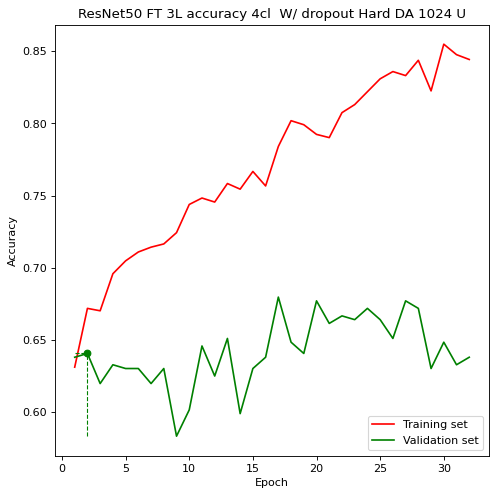

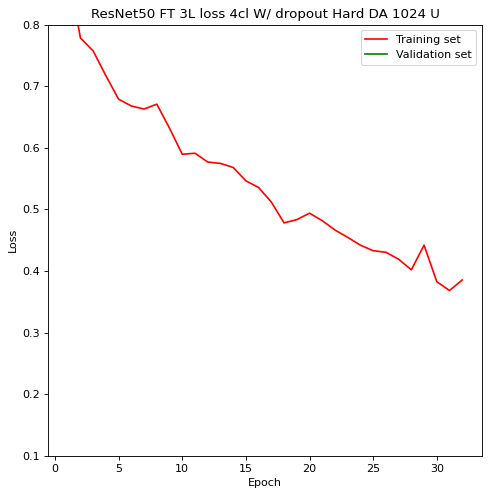

In [127]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 3L accuracy 4cl  W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 3L loss 4cl W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

# En Fine Tuning 3 Layer se obtiene la mayor tasa en el Test: 62%